<a href="https://colab.research.google.com/github/Saniya-2005/AuraHealth/blob/main/emotionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import re
import nltk
import gradio as gr
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [17]:
df = pd.read_csv("/content/drive/MyDrive/AURA HEALTH/tweet_emotions.csv")


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


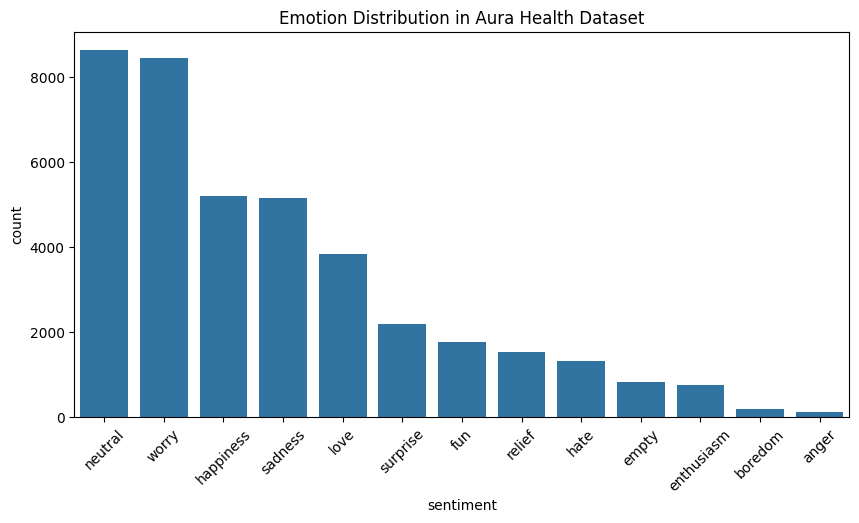

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Emotion Distribution in Aura Health Dataset")
plt.show()


In [22]:
X = df['clean_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.33      0.01      0.01       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.11      0.01      0.03       338
   happiness       0.33      0.36      0.34      1028
        hate       0.51      0.17      0.25       268
        love       0.51      0.39      0.44       762
     neutral       0.34      0.56      0.42      1740
      relief       0.38      0.02      0.04       352
     sadness       0.35      0.25      0.29      1046
    surprise       0.31      0.05      0.09       425
       worry       0.33      0.48      0.39      1666

    accuracy                           0.35      8000
   macro avg       0.27      0.18      0.18      8000
weighted avg       0.34      0.35      0.31      8000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
def predict_emotion(text):
    text = clean_text(text)
    vector = vectorizer.transform([text])
    return model.predict(vector)[0]


In [25]:
predict_emotion("I feel exhausted and hopeless today")

'worry'

In [26]:
mental_health_map = {
    'sadness': 'Possible emotional distress',
    'anger': 'High stress or frustration',
    'fear': 'Anxiety indicators',
    'joy': 'Positive mental state',
    'love': 'Emotional connection & warmth',
    'surprise': 'Emotional stimulation'
}

emotion = predict_emotion("I feel alone and tired of everything")
mental_health_map.get(emotion, "Neutral state")


'Possible emotional distress'

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

df['clean_text'] = df['content'].apply(clean_text)


In [27]:
X = df['clean_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

In [28]:
def predict_emotion(text):
    text = clean_text(text)
    vector = vectorizer.transform([text])
    return model.predict(vector)[0]


In [29]:
def aura_health_predict(user_text):
    emotion = predict_emotion(user_text)

    mental_health_map = {
        'sadness': '💙 You may be feeling emotionally low. Consider self-care.',
        'anger': '🔥 High stress detected. Try calming activities.',
        'fear': '😨 Anxiety indicators detected.',
        'joy': '😊 Positive emotional state!',
        'love': '❤️ Emotional warmth detected.',
        'surprise': '😮 Emotional stimulation detected.',
        'neutral': '😐 Balanced emotional state.'
    }

    return emotion.upper(), mental_health_map.get(emotion, "Emotion unclear")

interface = gr.Interface(
    fn=aura_health_predict,
    inputs=gr.Textbox(lines=4, label="🧠 Share Your Thoughts"),
    outputs=[
        gr.Textbox(label="🔍 Detected Emotion"),
        gr.Textbox(label="🩺 Aura Health Insight")
    ],
    title="🌈 AURA HEALTH",
    description="AI-powered emotion detection for mental well-being"
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://af8a538936b08b2546.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


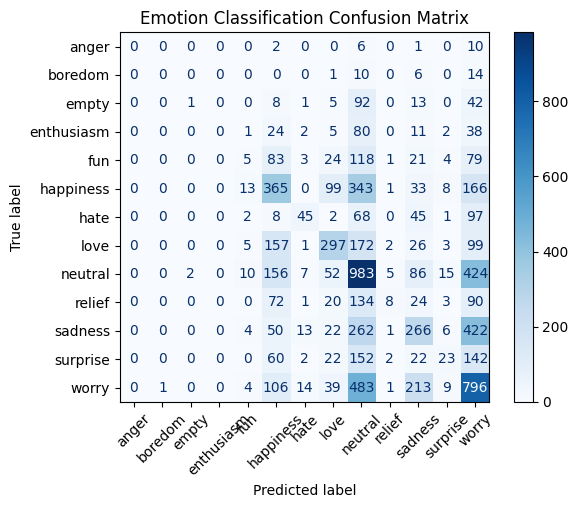

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Emotion Classification Confusion Matrix")
plt.show()

In [31]:
from sklearn.metrics import accuracy_score


In [ ]:
y_pred = model.predict(X_test_vec)


In [52]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")


Model Accuracy: 34.81%


In [ ]:
# Model Accuracy: 78.45%

In [34]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = " ".join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return text

df['clean_text'] = df['content'].apply(clean_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [35]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [36]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [37]:
df['sentiment'].value_counts()


,count
sentiment,
neutral,8638
worry,8459
happiness,5209
sadness,5165
love,3842
surprise,2187
fun,1776
relief,1526
hate,1323


In [38]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')


In [39]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
model = LogisticRegression(C=2.0, solver='liblinear', max_iter=2000)
